In [1]:
import pandas as pd
import seaborn as sns
import numpy.random as random
import numpy as np
import matplotlib.pyplot as plt

# Generate some illustrative, fake data 

In [2]:
df = pd.DataFrame(
    {"A":random.poisson(20,1000), 
     "B":random.poisson(10,1000)})

df["C"] = df["A"].apply(lambda x: random.poisson(abs(x)))
df["D"] = df["A"].apply(lambda x: random.poisson(max(10,100-x)))

df["E"] = df["B"].apply(lambda x: random.poisson(abs(x)))
df["F"] = df["B"].apply(lambda x: random.poisson(max(10,100-x)))



df["G"] = df["E"].apply(lambda x: -random.poisson(abs(x)))
df["H"] = df["F"].apply(lambda x: -random.poisson(max(10,100-x)))

df["I"] = df["G"].apply(lambda x: -random.poisson(abs(x)))
df["J"] = df["H"].apply(lambda x: -random.poisson(max(10,100-x)))

# See what solutions are around 

suppress deprecation warning for jointplot in seaborn:
[https://stackoverflow.com/questions/33792478/how-to-suppress-matplotlib-warning/34452373](https://stackoverflow.com/questions/33792478/how-to-suppress-matplotlib-warning/34452373)

In [3]:
import warnings
warnings.filterwarnings("ignore")

https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html
    
https://seaborn.pydata.org/generated/seaborn.JointGrid.html
    
    

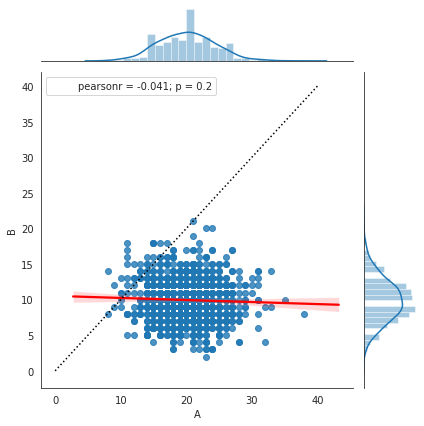

In [4]:
from scipy import stats

with sns.axes_style('white'):
    g = sns.jointplot("A", "B", df, kind='reg',
                      joint_kws={'line_kws':{'color':'red'}})
    g.ax_joint.plot(np.linspace(0, 40),
                    np.linspace(0, 40), ':k')
    g = g.annotate(stats.pearsonr)



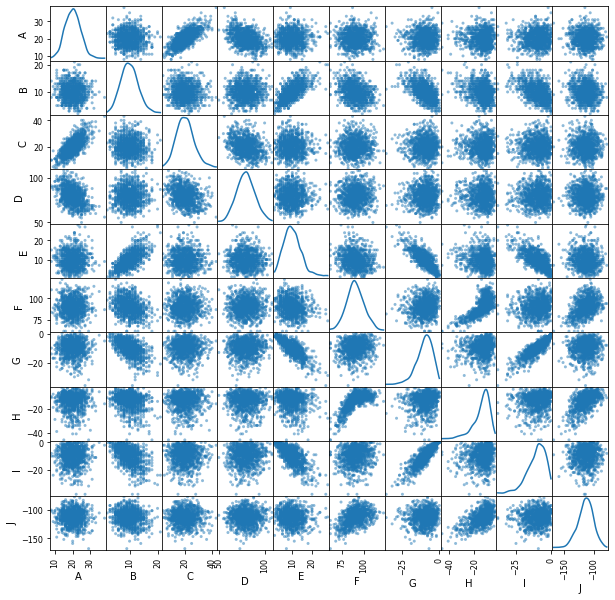

In [5]:
pd.plotting.scatter_matrix(df,figsize=(10,10),diagonal="kde");

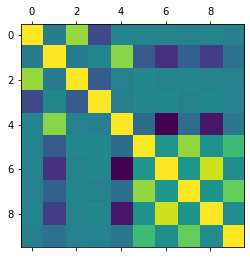

In [6]:
plt.matshow(df.corr())
plt.show()

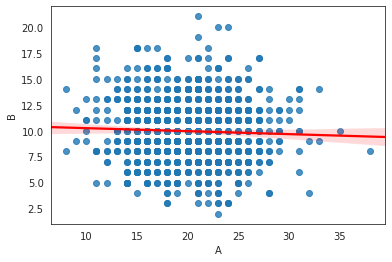

In [7]:
with sns.axes_style('white'):
    g = sns.regplot(data=df,x="A", y="B", line_kws={'color':'red'})

# Solution 

In [8]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats
    
def plotit(df, *args, **kwargs):
    
    if "dropna" not in kwargs:
        kwargs["dropna"] = True
    
    def mapit(x):
        cmap=plt.get_cmap("Greens")
        try:
            return cmap(int(abs(x)*256))
        except Exception as e:
            print(e,x)
        return cmap(0)

    def f(*args, **kwargs):
        x = args[0]
        y = args[1]
        s = stats.pearsonr(x,y)
        a = sns.regplot(*args,**kwargs, dropna=True)
        a.set_title("{r:.2f}/{p:.2f}".format(r=s[0],p=s[1]))
        a.set_facecolor(mapit(s[0]))
        return a

    with sns.axes_style('white'):
        g = sns.PairGrid(data=df, *args, **kwargs)
        try:
            g = g.map_diag(sns.kdeplot)
            g = g.map_offdiag(f,  line_kws={'color':'red'})
        except TypeError:
            g = g.map(f,  line_kws={'color':'red'})

    plt.plot();

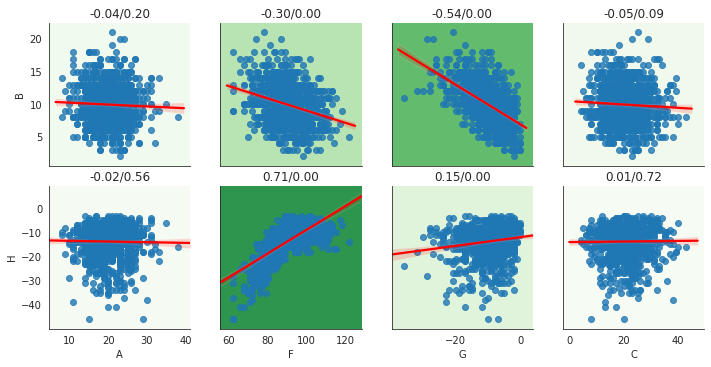

In [9]:
plotit(df, x_vars=["A","F","G","C"],y_vars=["B","H"])

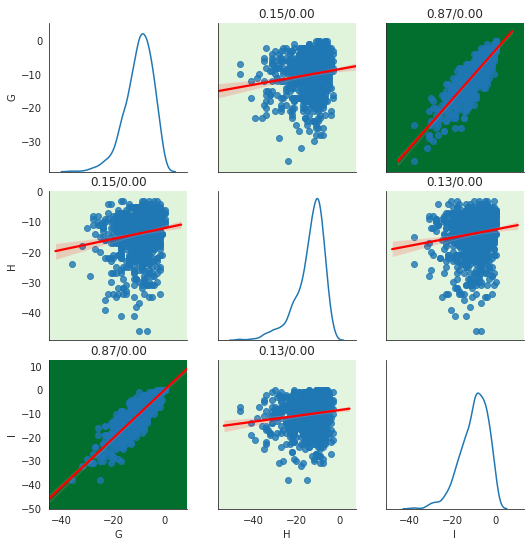

In [10]:
plotit(df, vars=["G","H","I"])